# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.nakagami.html#scipy.stats.nakagami
nu = 4.97
nakagami_rv = sts.nakagami(nu)
sample = nakagami_rv.rvs(100)
sample

array([1.01084644, 1.21815021, 0.76398474, 1.08582866, 0.71382935,
       1.07693149, 1.22682076, 0.60271979, 0.94323621, 0.83241304,
       0.86513541, 1.41046732, 0.68655239, 0.82893808, 0.92823143,
       1.32734366, 1.09503678, 1.06872065, 1.13740857, 1.14062825,
       0.85346826, 1.08079353, 1.01285742, 1.15678355, 0.62499111,
       0.81369685, 0.91221777, 1.15045534, 0.79432626, 1.08756744,
       0.70527943, 0.95524786, 0.90003911, 0.48837882, 1.07336117,
       0.72282708, 0.90429754, 0.75499157, 0.97063382, 0.53789614,
       1.14260103, 0.39154242, 0.91759618, 1.05215895, 0.68537891,
       1.1619111 , 1.06744119, 0.80708158, 0.64462928, 0.71352503,
       0.79046219, 0.53239665, 0.80633872, 0.63459706, 1.00821666,
       1.29426875, 0.97343098, 1.23634688, 0.96190274, 0.72677349,
       1.42536894, 1.43617741, 0.92910739, 1.28458836, 0.92279083,
       0.93924116, 1.1794825 , 0.98965063, 1.46053839, 1.02320418,
       1.16842401, 0.95743734, 0.92213369, 1.10171786, 1.03873

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = nakagami_rv.mean() # настоящее среднее случайной величины
print(real_mean)

0.9752036285923569


In [5]:
real_var = nakagami_rv.var() # настоящая дисперсия случайной величины
print(real_var)

0.048977882780300463


In [6]:
real_std = nakagami_rv.std() # настоящая дисперсия случайной величины
print(real_std)

0.22130947286616645


### Постройте гистограмму выборки и теоретическую плотность распределения

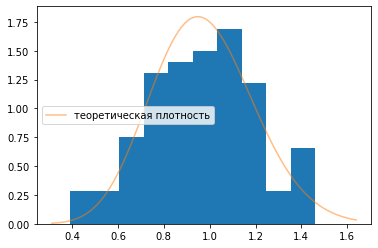

In [7]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(real_mean - 3 * real_std, real_mean + 3 * real_std,100)
pdf = nakagami_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [8]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.9648125747405544
0.05448577781084401


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

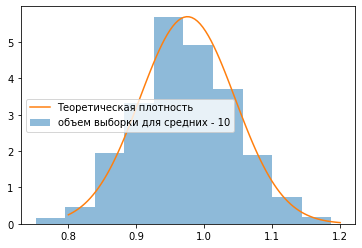

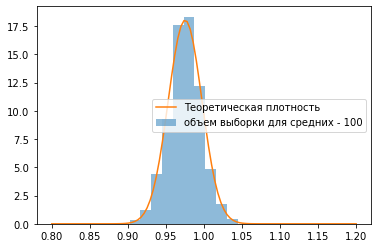

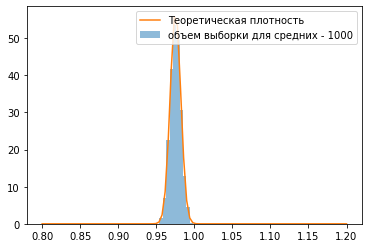

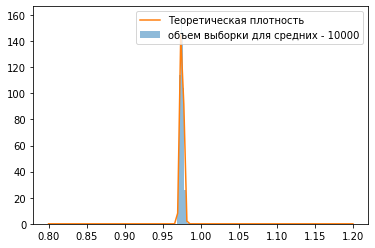

In [9]:
# ваш код тут

# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
        means.append(np.mean(nakagami_rv.rvs(N)))
    plt.figure()
    plt.hist(means, density=True, alpha=0.5, label='объем выборки для средних - ' + str(N))
    mean = np.mean(means)
    std = np.std(means)
    norm_rv = sts.norm(loc=real_mean, scale=real_std / np.sqrt(N))
    x = np.linspace(0.8, 1.2, 100)
    pdf = norm_rv.pdf(x)
    
    plt.plot(x, pdf, label='Теоретическая плотность')
    plt.legend()
    plt.show()


Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?

**Ваш ответ:**  *Хорошо!*

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [10]:
df = pd.read_csv('telecom_churn.csv')
df

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [11]:
total_day_calls_churn_false = df.loc[df['churn'] == False, 'total day calls']
total_day_calls_churn_true = df.loc[df['churn'] == True, 'total day calls']

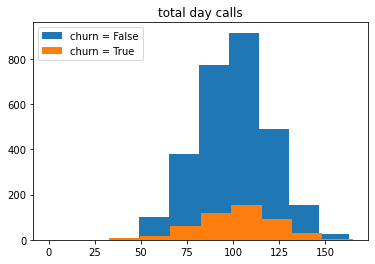

In [12]:
plt.hist(total_day_calls_churn_false, label='churn = False')
plt.hist(total_day_calls_churn_true, label='churn = True')
plt.title('total day calls')
plt.legend()
plt.show()

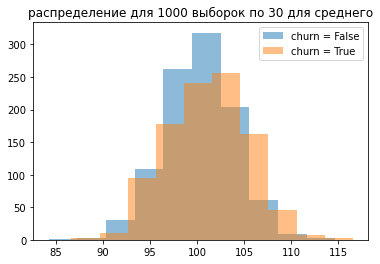

In [13]:
N = 30
means_false = []
means_true = []
for i in range(1000):
    means_false.append(np.mean(np.random.choice(total_day_calls_churn_false, N)))
    means_true.append(np.mean(np.random.choice(total_day_calls_churn_true, N)))
plt.figure()
plt.hist(means_false, alpha=0.5, label='churn = False')
plt.hist(means_true, alpha=0.5, label='churn = True')
plt.title('распределение для 1000 выборок по ' + str(N) + ' для среднего')
plt.legend()
plt.show()

In [14]:
mean_false = np.mean(total_day_calls_churn_false)
mean_true = np.mean(total_day_calls_churn_true)
print ('среднее для churn = False: {}', mean_false)
print ('среднее для churn = True: {}', mean_true)

среднее для churn = False: {} 100.28315789473685
среднее для churn = True: {} 101.33540372670808


In [15]:
# стандартное отклонение выборки с ddof = 1
std_false = np.std(total_day_calls_churn_false, ddof = 1)
std_true = np.std(total_day_calls_churn_true, ddof = 1)
print ('стандартное отклонение для churn = False: {}', std_false)
print ('стандартное отклонение для churn = True: {}', std_true)

стандартное отклонение для churn = False: {} 19.801156951805503
стандартное отклонение для churn = True: {} 21.58230721307551


In [16]:
print("Доверительный интервал для среднего по цпт для churn = False: [{}, {}] ".format(
    mean_false - 1.95996 * std_false / np.sqrt(N), mean_false + 1.95996 * std_false / np.sqrt(N) 
))
print("Доверительный интервал для среднего по цпт для churn = True: [{}, {}] ".format(
    mean_true - 1.95996 * std_true / np.sqrt(N), mean_true + 1.95996 * std_true / np.sqrt(N) 
))

Доверительный интервал для среднего по цпт для churn = False: [93.19754948816785, 107.36876630130584] 
Доверительный интервал для среднего по цпт для churn = True: [93.61243189257095, 109.0583755608452] 


In [17]:
from statsmodels.stats.weightstats import _zconfint_generic

In [18]:
print("_zconfint_generic для churn = False", _zconfint_generic(mean_false, std_false / np.sqrt(N), 0.05, 'two-sided'))
print("_zconfint_generic для churn = True", _zconfint_generic(mean_true, std_true / np.sqrt(N), 0.05, 'two-sided'))

_zconfint_generic для churn = False (93.19753508333791, 107.36878070613578)
_zconfint_generic для churn = True (93.61241619200023, 109.05839126141593)


*Значения интервалов равны до 4-го знака после запятой*